<a href="https://colab.research.google.com/github/Brok3t/IA-SCHOOL/blob/main/TimeSeries_BTC_EUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

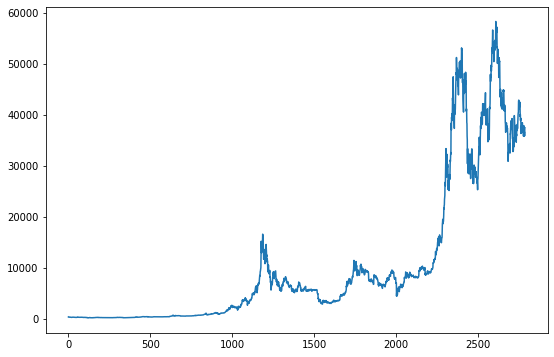

In [ ]:
#Les imports classiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Lecture du CSV
bitcoin = pd.read_csv('/content/BTC-EUR.csv')
bitcoin.head()

#Création du graphique Plot
bitcoin['Close'].plot(figsize=(9,6))
plt.show()


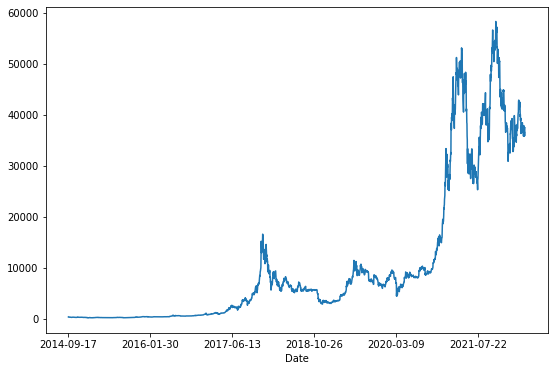

In [ ]:
from pandas.io.parsers.base_parser import is_index_col
# Pour travailler sur une Base temporelle
bitcoin.index
bitcoin = pd.read_csv('/content/BTC-EUR.csv',index_col='Date')
bitcoin['Close'].plot(figsize=(9,6))
plt.show()

In [ ]:
#Nous allons demander à panda d'interpreter l'index comme étant une date
bitcoin = pd.read_csv('/content/BTC-EUR.csv',index_col='Date', parse_dates=True)
bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625


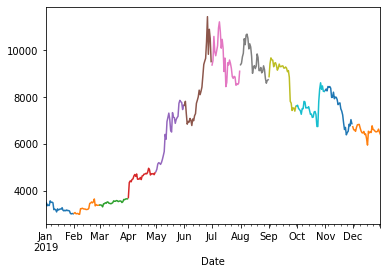

In [ ]:
#resample = regrouper des donnees selon une fréquence temporelle
bitcoin.loc['2019','Close'].resample('M').plot()
plt.show()
#Ici on chaque mois qui correspond à une couleur

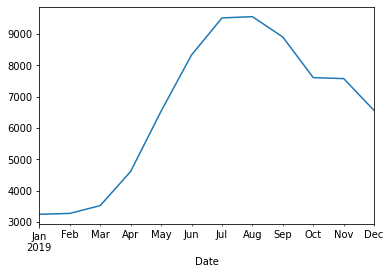

In [ ]:
#La meme chose mais avec la moyenne par mois
#On ajoute juste un .mean()
bitcoin.loc['2019','Close'].resample('M').mean().plot()
plt.show()
# Pour afficher le plot pour un resample de 2 semaines, On écrit .resample('2W') pour 2 week


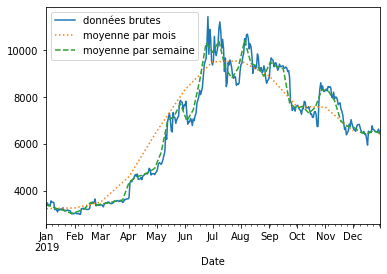

In [ ]:
#Dans un graphique, il est intéressant d'afficher toutes ces données en un seul graphique

#Ici les données 'brutes'
bitcoin.loc['2019','Close'].plot(label="données brutes")
#Ici les données regroupées par Mois grâce au .resample('M') pour Month
bitcoin.loc['2019','Close'].resample('M').mean().plot(label="moyenne par mois", ls=':')
#Ici les données par semaine  grâce au .resample('W') pour week
bitcoin.loc['2019','Close'].resample('W').mean().plot(label="moyenne par semaine", ls='--')

#On affiche le tout avec la légende
plt.legend()
plt.show()

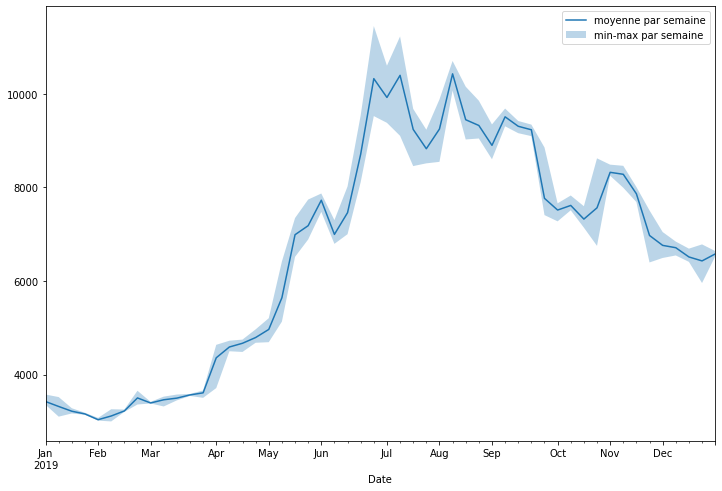

In [ ]:
#AGGREGATE permet de rassembler plusieurs statistique dans un seul tableau
m = bitcoin.loc['2019','Close'].resample('W').agg(['mean','std','min','max'])

plt.figure(figsize=(12,8))
m['mean']['2019'].plot(label='moyenne par semaine')
plt.fill_between(m.index, m['max'],m['min'],alpha=0.3, label = 'min-max par semaine')

plt.legend()
plt.show()


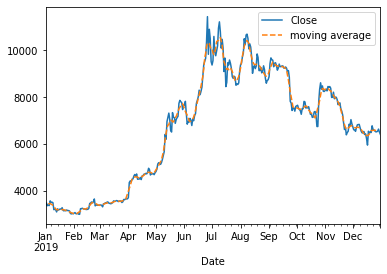

In [ ]:
#MOVING AVERAGE = C'est une technique qui permet de calculer une moyenne  sur une fenêtre de valeur
bitcoin.loc['2019','Close'].plot()
bitcoin.loc['2019','Close'].rolling(window=7, center=True).mean().plot(label='moving average', ls='--')

plt.legend()
plt.show()

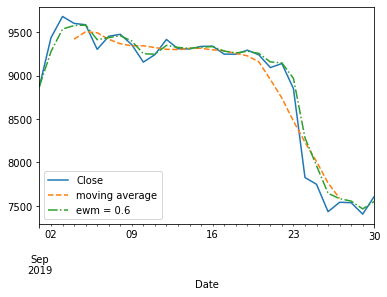

In [ ]:
#Exp Weighted Fonction = Moyenne mobile exponentielle (pour le mois de septembre 2019)
bitcoin.loc['2019-09','Close'].plot()
bitcoin.loc['2019-09','Close'].rolling(window=7, center=True).mean().plot(label='moving average', ls='--')
bitcoin.loc['2019-09','Close'].ewm(alpha=0.6).mean().plot(label='ewm = 0.6', ls='-.')

plt.legend()
plt.show()

#On remarque que le ewm colle mieux sur le graphique et commence à la même période


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


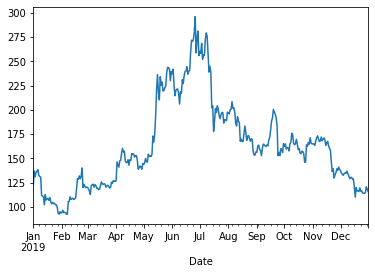

In [ ]:
from pandas.io.parsers.readers import read_csv
#Assembler des data frames (Bitcoin VS ethereum)
ethereum = pd.read_csv('/content/ETH-EUR.csv',index_col='Date', parse_dates=True)
ethereum['2019']['Close'].plot()

#On remarque ici que l'Ethereum commence en janvier 2019, donc bien plus tard que le commencement du bitcoin, il faudra donc utiliser un dataframe pandas pour inner join les deux tableaux de crypto

In [ ]:
#MERGE et JOIN = C'est l'équivalent des joins de SQL
pd.merge(bitcoin, ethereum, on='Date', how='inner',suffixes=('_btc','_eth'))


,Open_btc,High_btc,Low_btc,Close_btc,Adj Close_btc,Volume_btc,Open_eth,High_eth,Low_eth,Close_eth,Adj Close_eth,Volume_eth
Date,,,,,,,,,,,,
2014-09-17,359.546204,361.468506,351.586884,355.957367,355.957367,16389166,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,355.588409,355.505402,319.789459,328.539368,328.539368,26691849,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,328.278503,330.936707,298.921021,307.761139,307.761139,29560103,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,307.665253,329.978180,303.931244,318.758972,318.758972,28736826,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,318.120514,321.504517,306.502197,310.632446,310.632446,20702625,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-01,35768.542969,36635.972656,35647.636719,36515.671875,36515.671875,25631586954,2589.219238,2692.687012,2587.402832,2684.165527,2684.165527,1.455415e+10
2022-05-02,36518.609375,37167.527344,36357.863281,36660.191406,36660.191406,31325499196,2684.030518,2734.287354,2654.372314,2718.791748,2718.791748,1.770695e+10
2022-05-03,36659.035156,36719.820313,35711.640625,35865.914063,35865.914063,25962754911,2718.546143,2719.287354,2624.402100,2644.522217,2644.522217,1.237582e+10


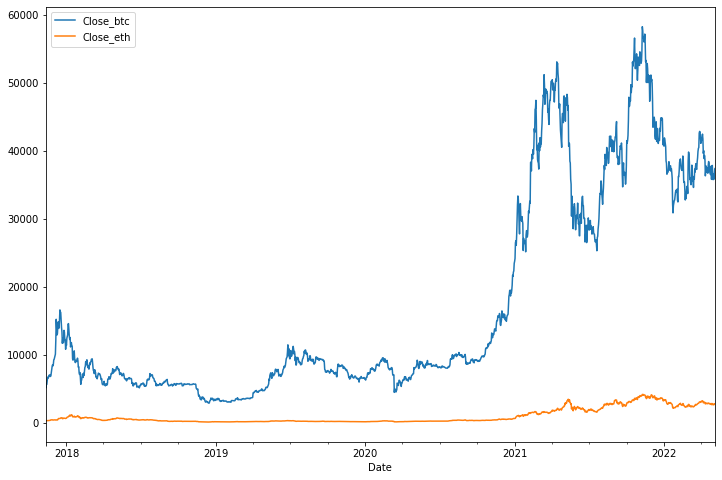

In [ ]:
from IPython.core.pylabtools import figsize
#On le stocke dans une variable : btc_eth
btc_eth = pd.merge(bitcoin, ethereum, on='Date', how='inner',suffixes=('_btc','_eth'))
#on plot le tout
btc_eth[['Close_btc','Close_eth']].plot(figsize=(12,8))
#On remarque que nos deux crypto ne respectent pas la même echelle

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3727109ad0>,
      dtype=object)

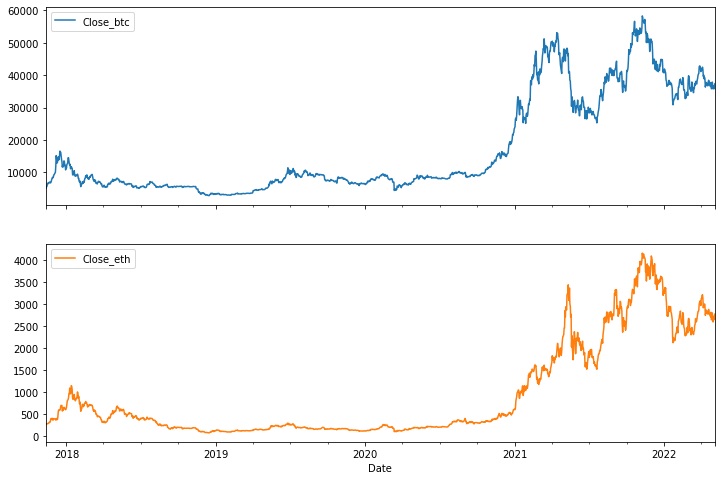

In [ ]:
#Pour eviter ça, on les sépare en deux graphs avec des différentes échelles
btc_eth[['Close_btc','Close_eth']].plot(subplots=True,figsize=(12,8))

In [ ]:
#On remarque que les deux graphiques sont corrélés 
#Pour calculer la corrélation :
btc_eth[['Close_btc','Close_eth']].corr()

,Close_btc,Close_eth
Close_btc,1.000000,0.930787
Close_eth,0.930787,1.000000


La corrélation est de 93% ce qui prouve bien que les deux cryptos sont bien liées entre elles par des événements communs